# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 47kB/s  eta 0:00:01    91% |█████████████████████████████▎  | 13.4MB 42.7MB/s eta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

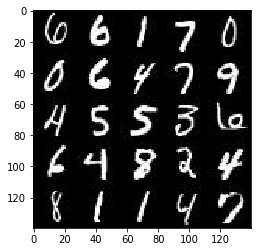

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

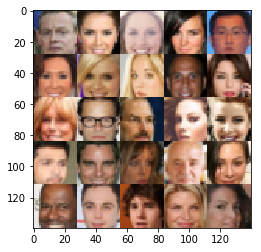

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate  = tf.placeholder(tf.float32, name='learning_rate')
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    alpha = 0.2
    
    with tf.variable_scope('discriminator', reuse=reuse):
        
        # First layer
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha*x1, x1)
        
        # Second layer
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha*bn2, bn2)
        
        # Third layer
        x3 = tf.layers.conv2d(x1, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha*bn3, bn3)
        
        # Output
        flat = tf.reshape(relu3, (-1,4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.2
    
    with tf.variable_scope('generator', reuse=not(is_train)):
        
        # First layer
        x1 = tf.layers.dense(z, 7*7*512)
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        bn1 = tf.layers.batch_normalization(x1, training=is_train)
        relu1 = tf.maximum(bn1*alpha, bn1)
        # 7x7x512 now
        
        # Second layer
        x2 = tf.layers.conv2d_transpose(relu1, 256, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=is_train)
        relu2 = tf.maximum(bn2*alpha, bn2)        
        # 14x14x256 now
        
        # Third layer
        x3 = tf.layers.conv2d_transpose(relu2, 128, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=is_train)
        relu3 = tf.maximum(bn3*alpha, bn3)        
        # 28x28x128 now        

        # Output
        logits = tf.layers.conv2d_transpose(relu3, out_channel_dim, 5, strides=1, padding='same')
        # 28x28xout_channel_dim now         
        
        out = tf.tanh(logits)
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    smooth = 0.1
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*(1-smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake    
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [22]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    steps = 0
    print_every = 10
    show_every = 100
    
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))                
                
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                if steps % print_every ==0:
                    train_loss_d = d_loss.eval({input_z: batch_z,input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
        
                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.0056... Generator Loss: 1.0962
Epoch 1/2... Discriminator Loss: 0.6383... Generator Loss: 1.8179
Epoch 1/2... Discriminator Loss: 0.4852... Generator Loss: 2.3513
Epoch 1/2... Discriminator Loss: 0.4566... Generator Loss: 2.6114
Epoch 1/2... Discriminator Loss: 0.4224... Generator Loss: 2.8099
Epoch 1/2... Discriminator Loss: 0.4745... Generator Loss: 2.3527
Epoch 1/2... Discriminator Loss: 0.5110... Generator Loss: 2.5559
Epoch 1/2... Discriminator Loss: 0.4595... Generator Loss: 2.4893
Epoch 1/2... Discriminator Loss: 0.4079... Generator Loss: 2.8695
Epoch 1/2... Discriminator Loss: 0.3929... Generator Loss: 3.1731


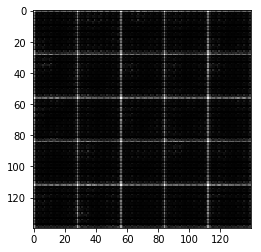

Epoch 1/2... Discriminator Loss: 0.3906... Generator Loss: 3.3423
Epoch 1/2... Discriminator Loss: 0.3600... Generator Loss: 3.8711
Epoch 1/2... Discriminator Loss: 0.3571... Generator Loss: 4.2556
Epoch 1/2... Discriminator Loss: 0.3548... Generator Loss: 4.2006
Epoch 1/2... Discriminator Loss: 0.3555... Generator Loss: 4.2607
Epoch 1/2... Discriminator Loss: 0.3934... Generator Loss: 3.0656
Epoch 1/2... Discriminator Loss: 0.4209... Generator Loss: 2.8594
Epoch 1/2... Discriminator Loss: 0.6375... Generator Loss: 1.8744
Epoch 1/2... Discriminator Loss: 0.7551... Generator Loss: 1.5636
Epoch 1/2... Discriminator Loss: 0.5457... Generator Loss: 2.5982


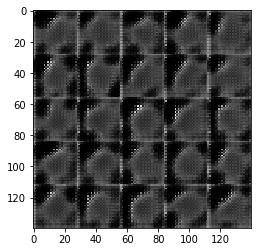

Epoch 1/2... Discriminator Loss: 0.8056... Generator Loss: 1.2056
Epoch 1/2... Discriminator Loss: 0.6721... Generator Loss: 1.9161
Epoch 1/2... Discriminator Loss: 0.8135... Generator Loss: 1.6514
Epoch 1/2... Discriminator Loss: 1.2467... Generator Loss: 1.4695
Epoch 1/2... Discriminator Loss: 0.8700... Generator Loss: 1.3559
Epoch 1/2... Discriminator Loss: 1.0770... Generator Loss: 1.0684
Epoch 1/2... Discriminator Loss: 0.9250... Generator Loss: 1.2575
Epoch 1/2... Discriminator Loss: 1.0154... Generator Loss: 1.1451
Epoch 1/2... Discriminator Loss: 1.0507... Generator Loss: 1.2039
Epoch 1/2... Discriminator Loss: 0.9590... Generator Loss: 1.3942


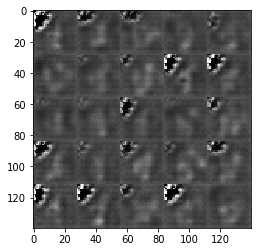

Epoch 1/2... Discriminator Loss: 0.9670... Generator Loss: 1.2412
Epoch 1/2... Discriminator Loss: 1.1335... Generator Loss: 1.1281
Epoch 1/2... Discriminator Loss: 0.9745... Generator Loss: 1.6760
Epoch 1/2... Discriminator Loss: 1.0067... Generator Loss: 1.3951
Epoch 1/2... Discriminator Loss: 1.1481... Generator Loss: 1.1620
Epoch 1/2... Discriminator Loss: 1.0453... Generator Loss: 1.0386
Epoch 1/2... Discriminator Loss: 1.0419... Generator Loss: 1.1607
Epoch 1/2... Discriminator Loss: 1.0216... Generator Loss: 1.1621
Epoch 1/2... Discriminator Loss: 1.0686... Generator Loss: 1.0665
Epoch 1/2... Discriminator Loss: 1.0456... Generator Loss: 1.0513


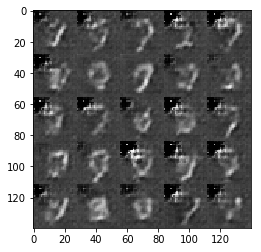

Epoch 1/2... Discriminator Loss: 1.1125... Generator Loss: 1.0639
Epoch 1/2... Discriminator Loss: 1.1125... Generator Loss: 1.2279
Epoch 1/2... Discriminator Loss: 0.9721... Generator Loss: 1.3626
Epoch 1/2... Discriminator Loss: 1.0293... Generator Loss: 1.2039
Epoch 1/2... Discriminator Loss: 1.0304... Generator Loss: 1.2158
Epoch 1/2... Discriminator Loss: 0.9969... Generator Loss: 1.2510
Epoch 2/2... Discriminator Loss: 1.1067... Generator Loss: 1.0288
Epoch 2/2... Discriminator Loss: 1.0332... Generator Loss: 0.9686
Epoch 2/2... Discriminator Loss: 1.0267... Generator Loss: 1.0986
Epoch 2/2... Discriminator Loss: 1.0783... Generator Loss: 1.1810


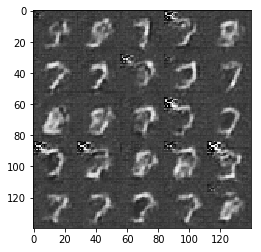

Epoch 2/2... Discriminator Loss: 1.0495... Generator Loss: 1.1084
Epoch 2/2... Discriminator Loss: 1.0502... Generator Loss: 1.0404
Epoch 2/2... Discriminator Loss: 1.0424... Generator Loss: 1.1094
Epoch 2/2... Discriminator Loss: 0.9981... Generator Loss: 1.3313
Epoch 2/2... Discriminator Loss: 1.0568... Generator Loss: 1.0274
Epoch 2/2... Discriminator Loss: 1.0317... Generator Loss: 1.4422
Epoch 2/2... Discriminator Loss: 1.0243... Generator Loss: 1.1022
Epoch 2/2... Discriminator Loss: 1.0186... Generator Loss: 1.3031
Epoch 2/2... Discriminator Loss: 0.9738... Generator Loss: 1.1515
Epoch 2/2... Discriminator Loss: 1.0429... Generator Loss: 1.1005


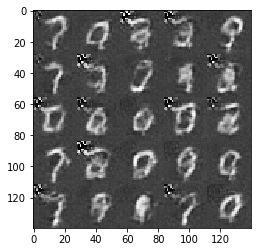

Epoch 2/2... Discriminator Loss: 1.0752... Generator Loss: 1.0380
Epoch 2/2... Discriminator Loss: 0.9918... Generator Loss: 1.4637
Epoch 2/2... Discriminator Loss: 1.0225... Generator Loss: 1.1338
Epoch 2/2... Discriminator Loss: 1.0682... Generator Loss: 1.0209
Epoch 2/2... Discriminator Loss: 1.0810... Generator Loss: 1.1155
Epoch 2/2... Discriminator Loss: 1.0332... Generator Loss: 1.1022
Epoch 2/2... Discriminator Loss: 0.9402... Generator Loss: 1.4824
Epoch 2/2... Discriminator Loss: 1.0767... Generator Loss: 1.1081
Epoch 2/2... Discriminator Loss: 0.9498... Generator Loss: 1.2257
Epoch 2/2... Discriminator Loss: 1.0671... Generator Loss: 1.1697


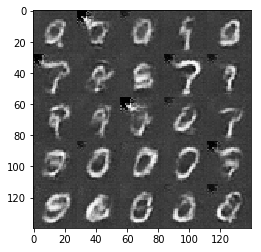

Epoch 2/2... Discriminator Loss: 1.0570... Generator Loss: 1.0592
Epoch 2/2... Discriminator Loss: 1.0461... Generator Loss: 1.1430
Epoch 2/2... Discriminator Loss: 1.0333... Generator Loss: 1.1754
Epoch 2/2... Discriminator Loss: 0.9837... Generator Loss: 1.1703
Epoch 2/2... Discriminator Loss: 1.0575... Generator Loss: 1.1012
Epoch 2/2... Discriminator Loss: 1.0085... Generator Loss: 1.1937
Epoch 2/2... Discriminator Loss: 1.0739... Generator Loss: 1.1184
Epoch 2/2... Discriminator Loss: 1.0675... Generator Loss: 1.0456
Epoch 2/2... Discriminator Loss: 0.9260... Generator Loss: 1.3253
Epoch 2/2... Discriminator Loss: 1.0085... Generator Loss: 1.0335


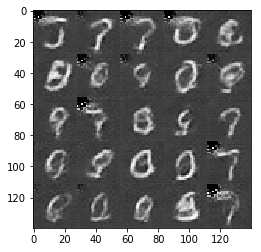

Epoch 2/2... Discriminator Loss: 1.0435... Generator Loss: 1.1069
Epoch 2/2... Discriminator Loss: 0.9340... Generator Loss: 1.1615
Epoch 2/2... Discriminator Loss: 1.0611... Generator Loss: 1.0399
Epoch 2/2... Discriminator Loss: 1.0564... Generator Loss: 1.1471
Epoch 2/2... Discriminator Loss: 0.8953... Generator Loss: 1.2192
Epoch 2/2... Discriminator Loss: 0.9938... Generator Loss: 1.2124
Epoch 2/2... Discriminator Loss: 1.0201... Generator Loss: 1.0338
Epoch 2/2... Discriminator Loss: 1.0053... Generator Loss: 1.2391
Epoch 2/2... Discriminator Loss: 0.9467... Generator Loss: 1.1298
Epoch 2/2... Discriminator Loss: 1.0090... Generator Loss: 1.1055


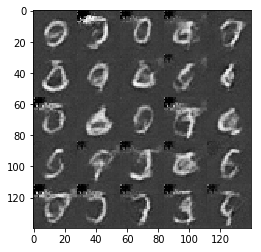

Epoch 2/2... Discriminator Loss: 1.0017... Generator Loss: 1.1367
Epoch 2/2... Discriminator Loss: 0.9652... Generator Loss: 1.1483
Epoch 2/2... Discriminator Loss: 1.0144... Generator Loss: 1.0857


In [23]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.1036... Generator Loss: 0.9516
Epoch 1/1... Discriminator Loss: 0.7646... Generator Loss: 1.4951
Epoch 1/1... Discriminator Loss: 0.6050... Generator Loss: 1.9577
Epoch 1/1... Discriminator Loss: 0.5007... Generator Loss: 2.3772
Epoch 1/1... Discriminator Loss: 0.4529... Generator Loss: 2.6482
Epoch 1/1... Discriminator Loss: 0.4941... Generator Loss: 2.9427
Epoch 1/1... Discriminator Loss: 0.3964... Generator Loss: 3.2219
Epoch 1/1... Discriminator Loss: 0.3909... Generator Loss: 3.4052
Epoch 1/1... Discriminator Loss: 0.3801... Generator Loss: 3.5592
Epoch 1/1... Discriminator Loss: 0.3714... Generator Loss: 3.7978


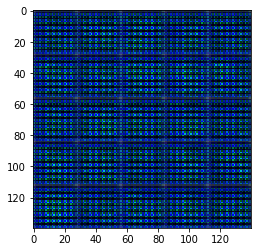

Epoch 1/1... Discriminator Loss: 0.3701... Generator Loss: 3.8774
Epoch 1/1... Discriminator Loss: 0.3553... Generator Loss: 4.2061
Epoch 1/1... Discriminator Loss: 0.3568... Generator Loss: 4.2999
Epoch 1/1... Discriminator Loss: 0.3512... Generator Loss: 4.3598
Epoch 1/1... Discriminator Loss: 0.3474... Generator Loss: 4.6658
Epoch 1/1... Discriminator Loss: 0.3442... Generator Loss: 4.8749
Epoch 1/1... Discriminator Loss: 0.3408... Generator Loss: 5.0200
Epoch 1/1... Discriminator Loss: 0.3413... Generator Loss: 4.8990
Epoch 1/1... Discriminator Loss: 0.3432... Generator Loss: 4.9252
Epoch 1/1... Discriminator Loss: 0.3393... Generator Loss: 5.2511


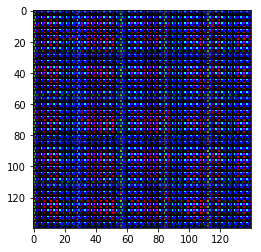

Epoch 1/1... Discriminator Loss: 0.3384... Generator Loss: 5.1867
Epoch 1/1... Discriminator Loss: 0.3366... Generator Loss: 5.4148
Epoch 1/1... Discriminator Loss: 0.3382... Generator Loss: 5.0611
Epoch 1/1... Discriminator Loss: 0.3385... Generator Loss: 5.2937
Epoch 1/1... Discriminator Loss: 0.3385... Generator Loss: 5.0829
Epoch 1/1... Discriminator Loss: 0.3351... Generator Loss: 5.2945
Epoch 1/1... Discriminator Loss: 0.3358... Generator Loss: 5.1870
Epoch 1/1... Discriminator Loss: 0.3358... Generator Loss: 5.3673
Epoch 1/1... Discriminator Loss: 0.3364... Generator Loss: 5.3859
Epoch 1/1... Discriminator Loss: 0.3338... Generator Loss: 5.8469


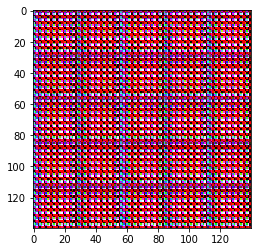

Epoch 1/1... Discriminator Loss: 0.3331... Generator Loss: 5.7685
Epoch 1/1... Discriminator Loss: 0.3322... Generator Loss: 5.9789
Epoch 1/1... Discriminator Loss: 0.3321... Generator Loss: 5.9170
Epoch 1/1... Discriminator Loss: 0.3368... Generator Loss: 5.6155
Epoch 1/1... Discriminator Loss: 0.3322... Generator Loss: 5.8007
Epoch 1/1... Discriminator Loss: 0.3329... Generator Loss: 5.8989
Epoch 1/1... Discriminator Loss: 0.3321... Generator Loss: 5.6840
Epoch 1/1... Discriminator Loss: 0.3324... Generator Loss: 5.8919
Epoch 1/1... Discriminator Loss: 0.3322... Generator Loss: 6.0427
Epoch 1/1... Discriminator Loss: 0.3357... Generator Loss: 5.9874


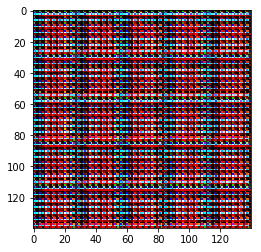

Epoch 1/1... Discriminator Loss: 0.3844... Generator Loss: 5.4007
Epoch 1/1... Discriminator Loss: 0.3653... Generator Loss: 6.0484
Epoch 1/1... Discriminator Loss: 0.3364... Generator Loss: 5.7102
Epoch 1/1... Discriminator Loss: 0.3349... Generator Loss: 5.7140
Epoch 1/1... Discriminator Loss: 0.3336... Generator Loss: 5.8510
Epoch 1/1... Discriminator Loss: 0.3355... Generator Loss: 5.4644
Epoch 1/1... Discriminator Loss: 0.3367... Generator Loss: 5.1802
Epoch 1/1... Discriminator Loss: 0.3339... Generator Loss: 5.6090
Epoch 1/1... Discriminator Loss: 0.3361... Generator Loss: 5.1456
Epoch 1/1... Discriminator Loss: 0.3357... Generator Loss: 5.1041


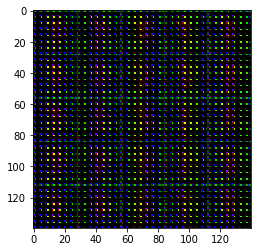

Epoch 1/1... Discriminator Loss: 0.3648... Generator Loss: 4.0971
Epoch 1/1... Discriminator Loss: 0.3473... Generator Loss: 4.7493
Epoch 1/1... Discriminator Loss: 0.3472... Generator Loss: 4.4279
Epoch 1/1... Discriminator Loss: 0.3416... Generator Loss: 4.7954
Epoch 1/1... Discriminator Loss: 0.3385... Generator Loss: 5.0988
Epoch 1/1... Discriminator Loss: 0.3413... Generator Loss: 4.5933
Epoch 1/1... Discriminator Loss: 0.3559... Generator Loss: 3.9704
Epoch 1/1... Discriminator Loss: 0.3513... Generator Loss: 4.2185
Epoch 1/1... Discriminator Loss: 0.3532... Generator Loss: 4.1102
Epoch 1/1... Discriminator Loss: 0.3497... Generator Loss: 4.1762


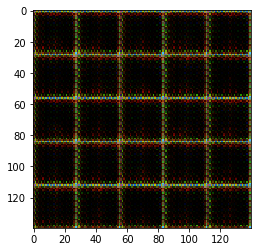

Epoch 1/1... Discriminator Loss: 0.3590... Generator Loss: 3.7974
Epoch 1/1... Discriminator Loss: 0.3584... Generator Loss: 4.5049
Epoch 1/1... Discriminator Loss: 0.3426... Generator Loss: 4.7995
Epoch 1/1... Discriminator Loss: 0.3433... Generator Loss: 4.7913
Epoch 1/1... Discriminator Loss: 0.3529... Generator Loss: 4.3734
Epoch 1/1... Discriminator Loss: 0.3493... Generator Loss: 4.2023
Epoch 1/1... Discriminator Loss: 0.3642... Generator Loss: 3.7814
Epoch 1/1... Discriminator Loss: 0.3556... Generator Loss: 4.0067
Epoch 1/1... Discriminator Loss: 0.3805... Generator Loss: 3.5395
Epoch 1/1... Discriminator Loss: 0.3814... Generator Loss: 3.3261


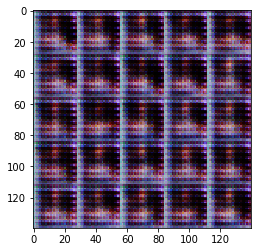

Epoch 1/1... Discriminator Loss: 3.3601... Generator Loss: 5.4306
Epoch 1/1... Discriminator Loss: 0.5399... Generator Loss: 2.1197
Epoch 1/1... Discriminator Loss: 0.4249... Generator Loss: 3.9389
Epoch 1/1... Discriminator Loss: 0.6642... Generator Loss: 1.9297
Epoch 1/1... Discriminator Loss: 0.7984... Generator Loss: 1.3487
Epoch 1/1... Discriminator Loss: 0.7958... Generator Loss: 1.6699
Epoch 1/1... Discriminator Loss: 0.7537... Generator Loss: 1.3204
Epoch 1/1... Discriminator Loss: 0.8051... Generator Loss: 1.2240
Epoch 1/1... Discriminator Loss: 0.6777... Generator Loss: 1.8062
Epoch 1/1... Discriminator Loss: 0.9427... Generator Loss: 0.9625


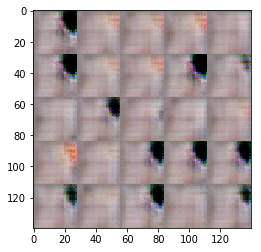

Epoch 1/1... Discriminator Loss: 0.8272... Generator Loss: 1.5563
Epoch 1/1... Discriminator Loss: 0.7515... Generator Loss: 1.7466
Epoch 1/1... Discriminator Loss: 0.7843... Generator Loss: 2.3639
Epoch 1/1... Discriminator Loss: 0.8547... Generator Loss: 1.5391
Epoch 1/1... Discriminator Loss: 0.7261... Generator Loss: 1.7990
Epoch 1/1... Discriminator Loss: 0.7188... Generator Loss: 1.9383
Epoch 1/1... Discriminator Loss: 0.8386... Generator Loss: 1.3267
Epoch 1/1... Discriminator Loss: 0.6979... Generator Loss: 1.9823
Epoch 1/1... Discriminator Loss: 0.7062... Generator Loss: 2.7043
Epoch 1/1... Discriminator Loss: 0.8631... Generator Loss: 1.3239


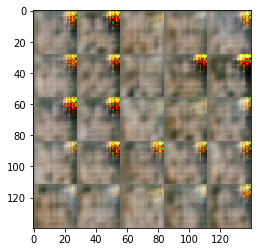

Epoch 1/1... Discriminator Loss: 0.8717... Generator Loss: 1.5853
Epoch 1/1... Discriminator Loss: 1.0642... Generator Loss: 1.0570
Epoch 1/1... Discriminator Loss: 1.0629... Generator Loss: 1.0337
Epoch 1/1... Discriminator Loss: 0.9468... Generator Loss: 1.4034
Epoch 1/1... Discriminator Loss: 0.9648... Generator Loss: 1.5155
Epoch 1/1... Discriminator Loss: 0.8844... Generator Loss: 1.3221
Epoch 1/1... Discriminator Loss: 1.0979... Generator Loss: 1.0356
Epoch 1/1... Discriminator Loss: 0.8961... Generator Loss: 1.4185
Epoch 1/1... Discriminator Loss: 1.0003... Generator Loss: 1.0259
Epoch 1/1... Discriminator Loss: 1.3110... Generator Loss: 0.9499


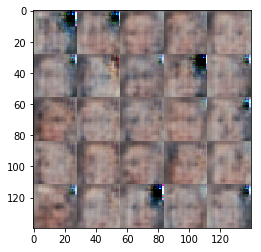

Epoch 1/1... Discriminator Loss: 0.9426... Generator Loss: 1.2560
Epoch 1/1... Discriminator Loss: 0.7467... Generator Loss: 1.7866
Epoch 1/1... Discriminator Loss: 1.1819... Generator Loss: 1.0186
Epoch 1/1... Discriminator Loss: 1.0674... Generator Loss: 1.1915
Epoch 1/1... Discriminator Loss: 1.0553... Generator Loss: 0.9794
Epoch 1/1... Discriminator Loss: 0.8644... Generator Loss: 2.0965
Epoch 1/1... Discriminator Loss: 1.0930... Generator Loss: 1.0795
Epoch 1/1... Discriminator Loss: 0.9115... Generator Loss: 2.6948
Epoch 1/1... Discriminator Loss: 0.9421... Generator Loss: 1.5539
Epoch 1/1... Discriminator Loss: 1.0519... Generator Loss: 1.0504


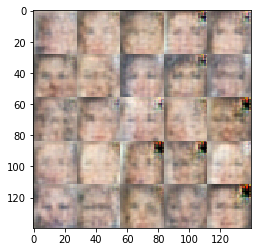

Epoch 1/1... Discriminator Loss: 1.1901... Generator Loss: 0.9561
Epoch 1/1... Discriminator Loss: 0.9704... Generator Loss: 2.0474
Epoch 1/1... Discriminator Loss: 0.8497... Generator Loss: 1.6259
Epoch 1/1... Discriminator Loss: 0.9001... Generator Loss: 1.4330
Epoch 1/1... Discriminator Loss: 0.7888... Generator Loss: 1.4967
Epoch 1/1... Discriminator Loss: 1.0449... Generator Loss: 1.3456
Epoch 1/1... Discriminator Loss: 1.0297... Generator Loss: 1.1936
Epoch 1/1... Discriminator Loss: 1.1554... Generator Loss: 0.9417
Epoch 1/1... Discriminator Loss: 1.1087... Generator Loss: 1.0549
Epoch 1/1... Discriminator Loss: 0.9838... Generator Loss: 1.8107


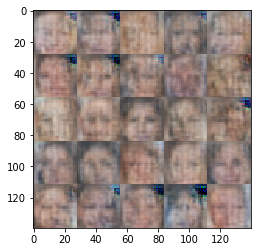

Epoch 1/1... Discriminator Loss: 1.3954... Generator Loss: 0.6361
Epoch 1/1... Discriminator Loss: 1.0187... Generator Loss: 1.0645
Epoch 1/1... Discriminator Loss: 1.0941... Generator Loss: 1.0055
Epoch 1/1... Discriminator Loss: 1.0761... Generator Loss: 1.1887
Epoch 1/1... Discriminator Loss: 1.1658... Generator Loss: 1.2939
Epoch 1/1... Discriminator Loss: 1.2209... Generator Loss: 0.9784
Epoch 1/1... Discriminator Loss: 1.3578... Generator Loss: 0.8067
Epoch 1/1... Discriminator Loss: 1.0868... Generator Loss: 1.0189
Epoch 1/1... Discriminator Loss: 1.1252... Generator Loss: 0.9358
Epoch 1/1... Discriminator Loss: 1.2043... Generator Loss: 0.8592


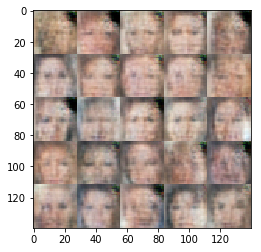

Epoch 1/1... Discriminator Loss: 1.0098... Generator Loss: 1.2182
Epoch 1/1... Discriminator Loss: 1.1563... Generator Loss: 0.9644
Epoch 1/1... Discriminator Loss: 1.3245... Generator Loss: 0.6059
Epoch 1/1... Discriminator Loss: 1.1056... Generator Loss: 1.0310
Epoch 1/1... Discriminator Loss: 1.1190... Generator Loss: 1.2189
Epoch 1/1... Discriminator Loss: 1.0033... Generator Loss: 1.1188
Epoch 1/1... Discriminator Loss: 1.2415... Generator Loss: 1.2849
Epoch 1/1... Discriminator Loss: 1.2507... Generator Loss: 0.9552
Epoch 1/1... Discriminator Loss: 1.0797... Generator Loss: 1.0668
Epoch 1/1... Discriminator Loss: 1.1581... Generator Loss: 0.9123


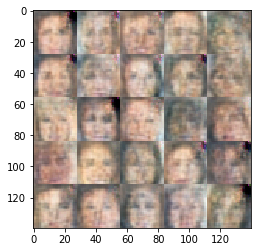

Epoch 1/1... Discriminator Loss: 1.2214... Generator Loss: 0.9497
Epoch 1/1... Discriminator Loss: 1.2363... Generator Loss: 0.9981
Epoch 1/1... Discriminator Loss: 1.1730... Generator Loss: 1.1250
Epoch 1/1... Discriminator Loss: 1.0492... Generator Loss: 1.3317
Epoch 1/1... Discriminator Loss: 0.9782... Generator Loss: 1.2179
Epoch 1/1... Discriminator Loss: 1.2151... Generator Loss: 0.8621
Epoch 1/1... Discriminator Loss: 1.1344... Generator Loss: 1.0926
Epoch 1/1... Discriminator Loss: 1.2253... Generator Loss: 1.1100
Epoch 1/1... Discriminator Loss: 1.2345... Generator Loss: 0.7855
Epoch 1/1... Discriminator Loss: 1.1259... Generator Loss: 1.1925


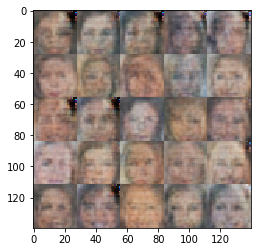

Epoch 1/1... Discriminator Loss: 1.0866... Generator Loss: 1.1524
Epoch 1/1... Discriminator Loss: 1.2298... Generator Loss: 0.8061
Epoch 1/1... Discriminator Loss: 1.1358... Generator Loss: 1.3388
Epoch 1/1... Discriminator Loss: 1.0586... Generator Loss: 1.2880
Epoch 1/1... Discriminator Loss: 1.0363... Generator Loss: 1.7459
Epoch 1/1... Discriminator Loss: 1.1364... Generator Loss: 1.0305
Epoch 1/1... Discriminator Loss: 1.0686... Generator Loss: 1.1371
Epoch 1/1... Discriminator Loss: 1.2289... Generator Loss: 1.3106


In [24]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.